<a href="https://colab.research.google.com/github/awaisnazir08/Squash-Ball-Detection/blob/main/squash_ball_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Jun  4 06:13:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

In [4]:
%cd {HOME}

/content


In [16]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.8/78.2 GB disk)


In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="my_api")
project = rf.workspace("squash-game-project").project("sq-ball-detection")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to sq-ball-detection-1 in yolov8:: 100%|██████████| 13656/13656 [00:02<00:00, 6449.57it/s]


In [6]:
from ultralytics import YOLO

In [8]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 plots=True

100% 21.5M/21.5M [00:00<00:00, 242MB/s]
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/sq-ball-detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffe

In [9]:
!zip -r /content/file.zip /content/datasets/runs

  adding: content/datasets/runs/ (stored 0%)
  adding: content/datasets/runs/detect/ (stored 0%)
  adding: content/datasets/runs/detect/train/ (stored 0%)
  adding: content/datasets/runs/detect/train/labels_correlogram.jpg (deflated 52%)
  adding: content/datasets/runs/detect/train/labels.jpg (deflated 44%)
  adding: content/datasets/runs/detect/train/weights/ (stored 0%)
  adding: content/datasets/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/datasets/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/datasets/runs/detect/train/val_batch0_labels.jpg (deflated 13%)
  adding: content/datasets/runs/detect/train/results.csv (deflated 89%)
  adding: content/datasets/runs/detect/train/train_batch2.jpg (deflated 4%)
  adding: content/datasets/runs/detect/train/train_batch5895.jpg (deflated 14%)
  adding: content/datasets/runs/detect/train/val_batch2_pred.jpg (deflated 13%)
  adding: content/datasets/runs/detect/train/args.yaml (deflated 51%)
  adding: conte

In [10]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
!ls {HOME}/datasets/runs/detect/train/

args.yaml					    results.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    train_batch0.jpg	 val_batch0_pred.jpg
confusion_matrix.png				    train_batch1.jpg	 val_batch1_labels.jpg
events.out.tfevents.1717481882.63a3fae0bb8b.9753.0  train_batch2.jpg	 val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch5895.jpg  val_batch2_labels.jpg
labels.jpg					    train_batch5896.jpg  val_batch2_pred.jpg
results.csv					    train_batch5897.jpg  weights


In [17]:
from IPython.display import Image

/content


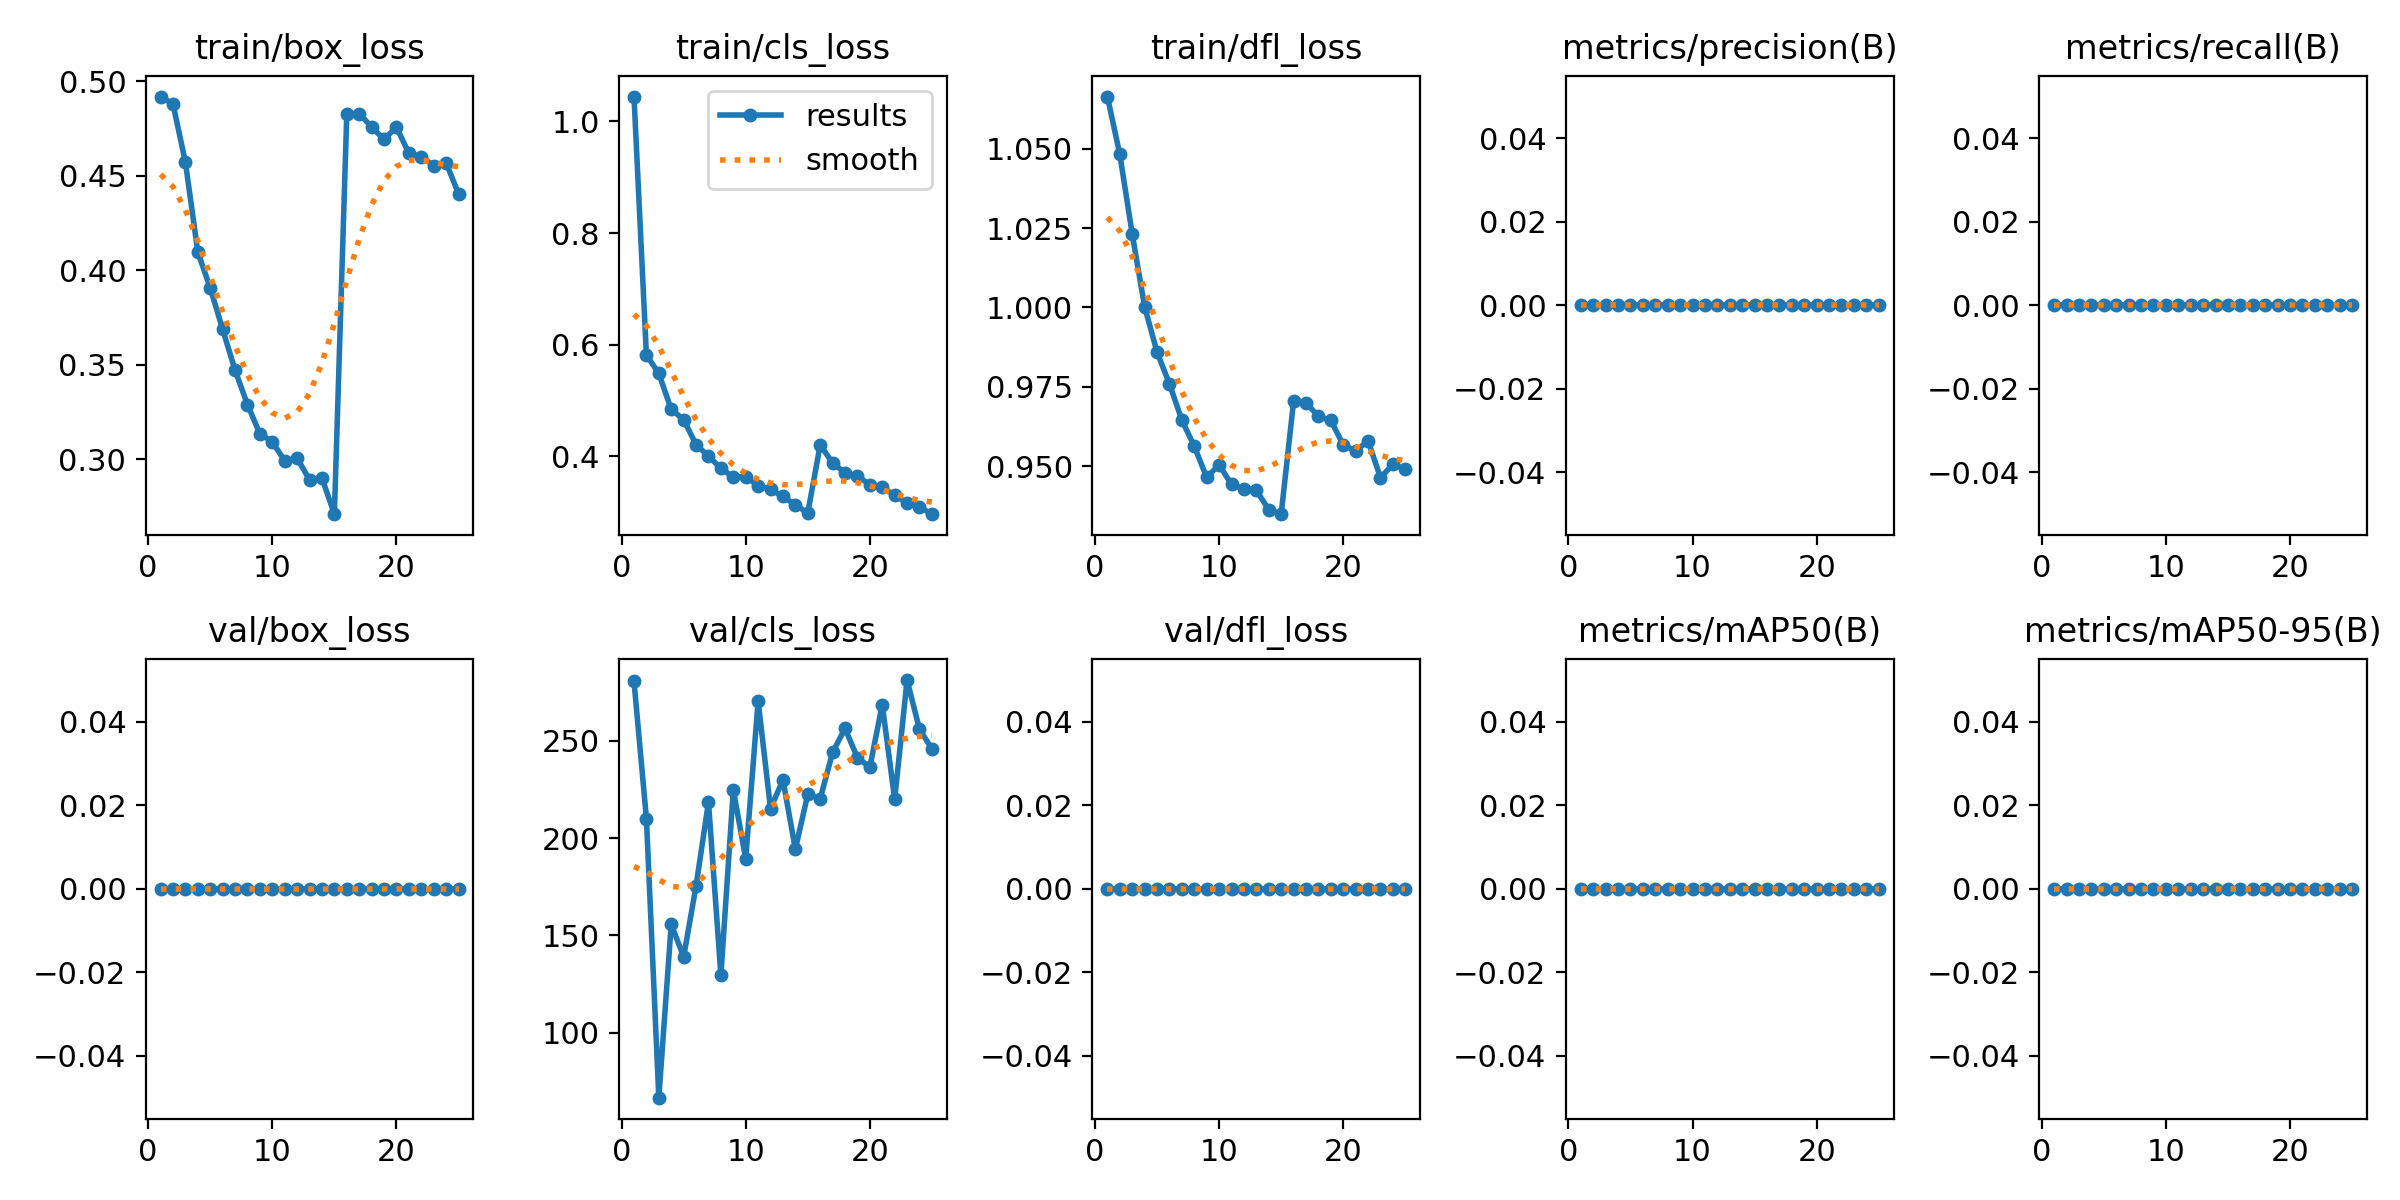

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=600)

/content


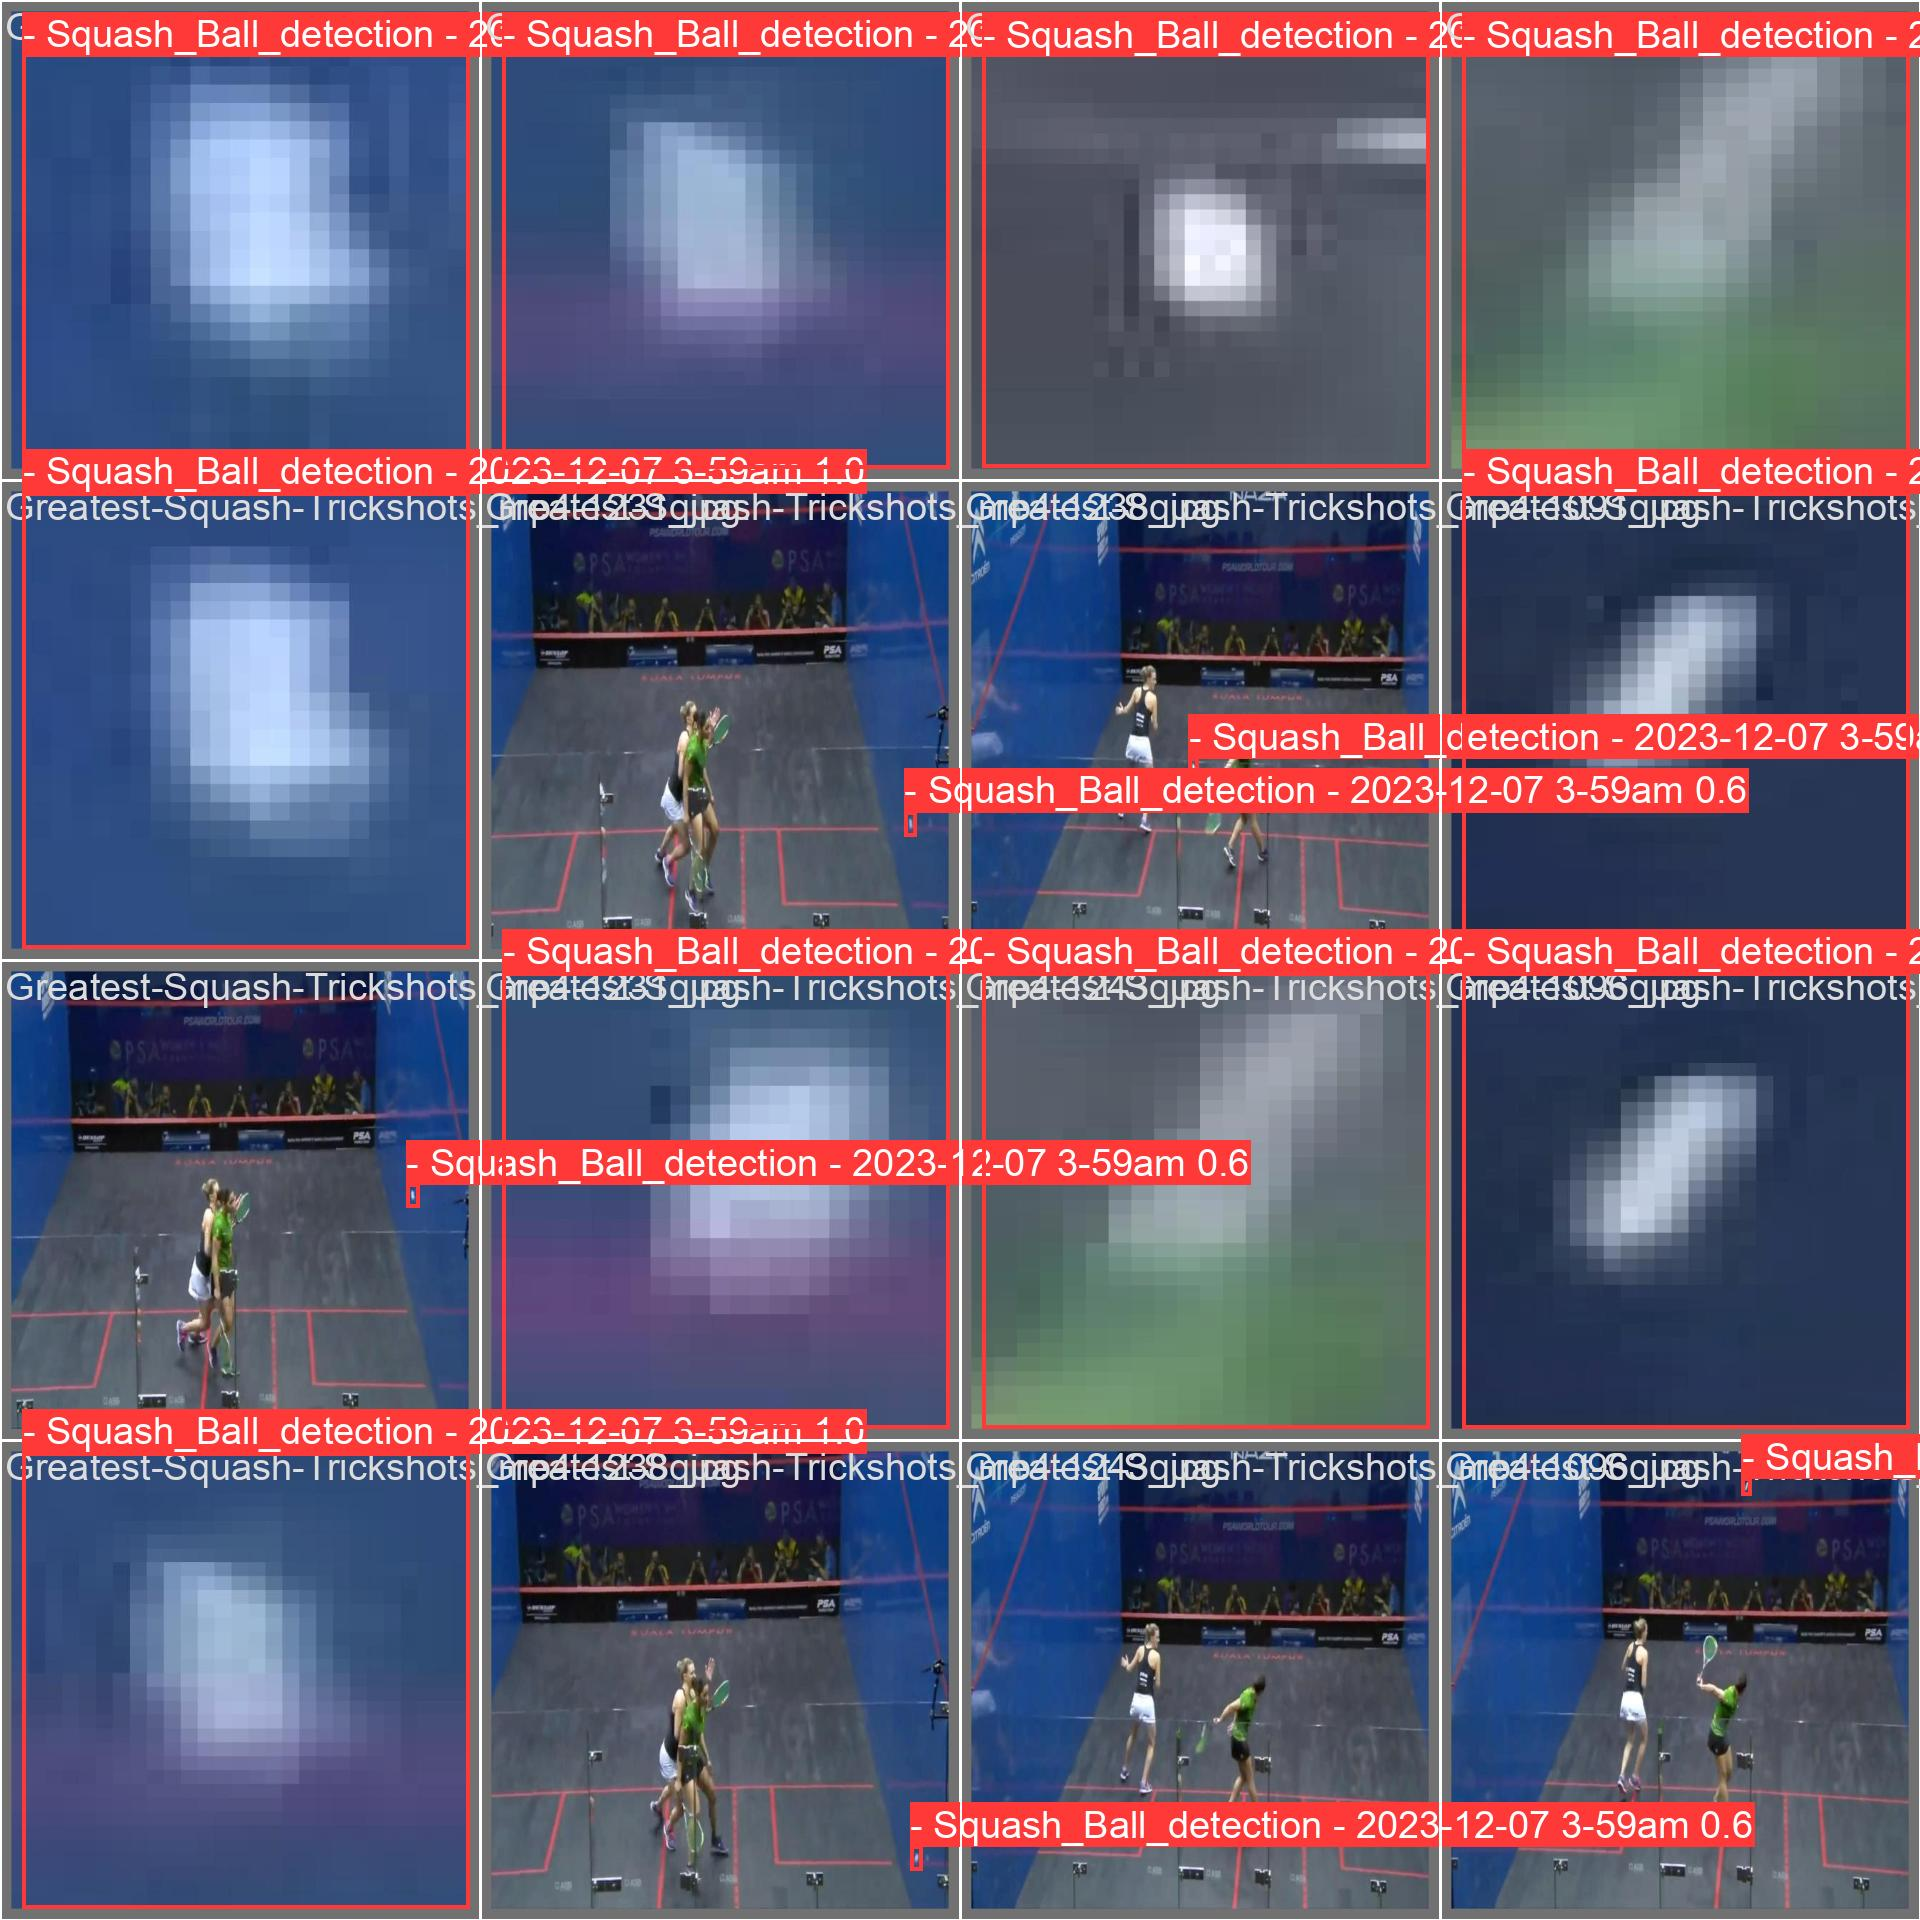

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/val_batch1_pred.jpg', width=600)

/content


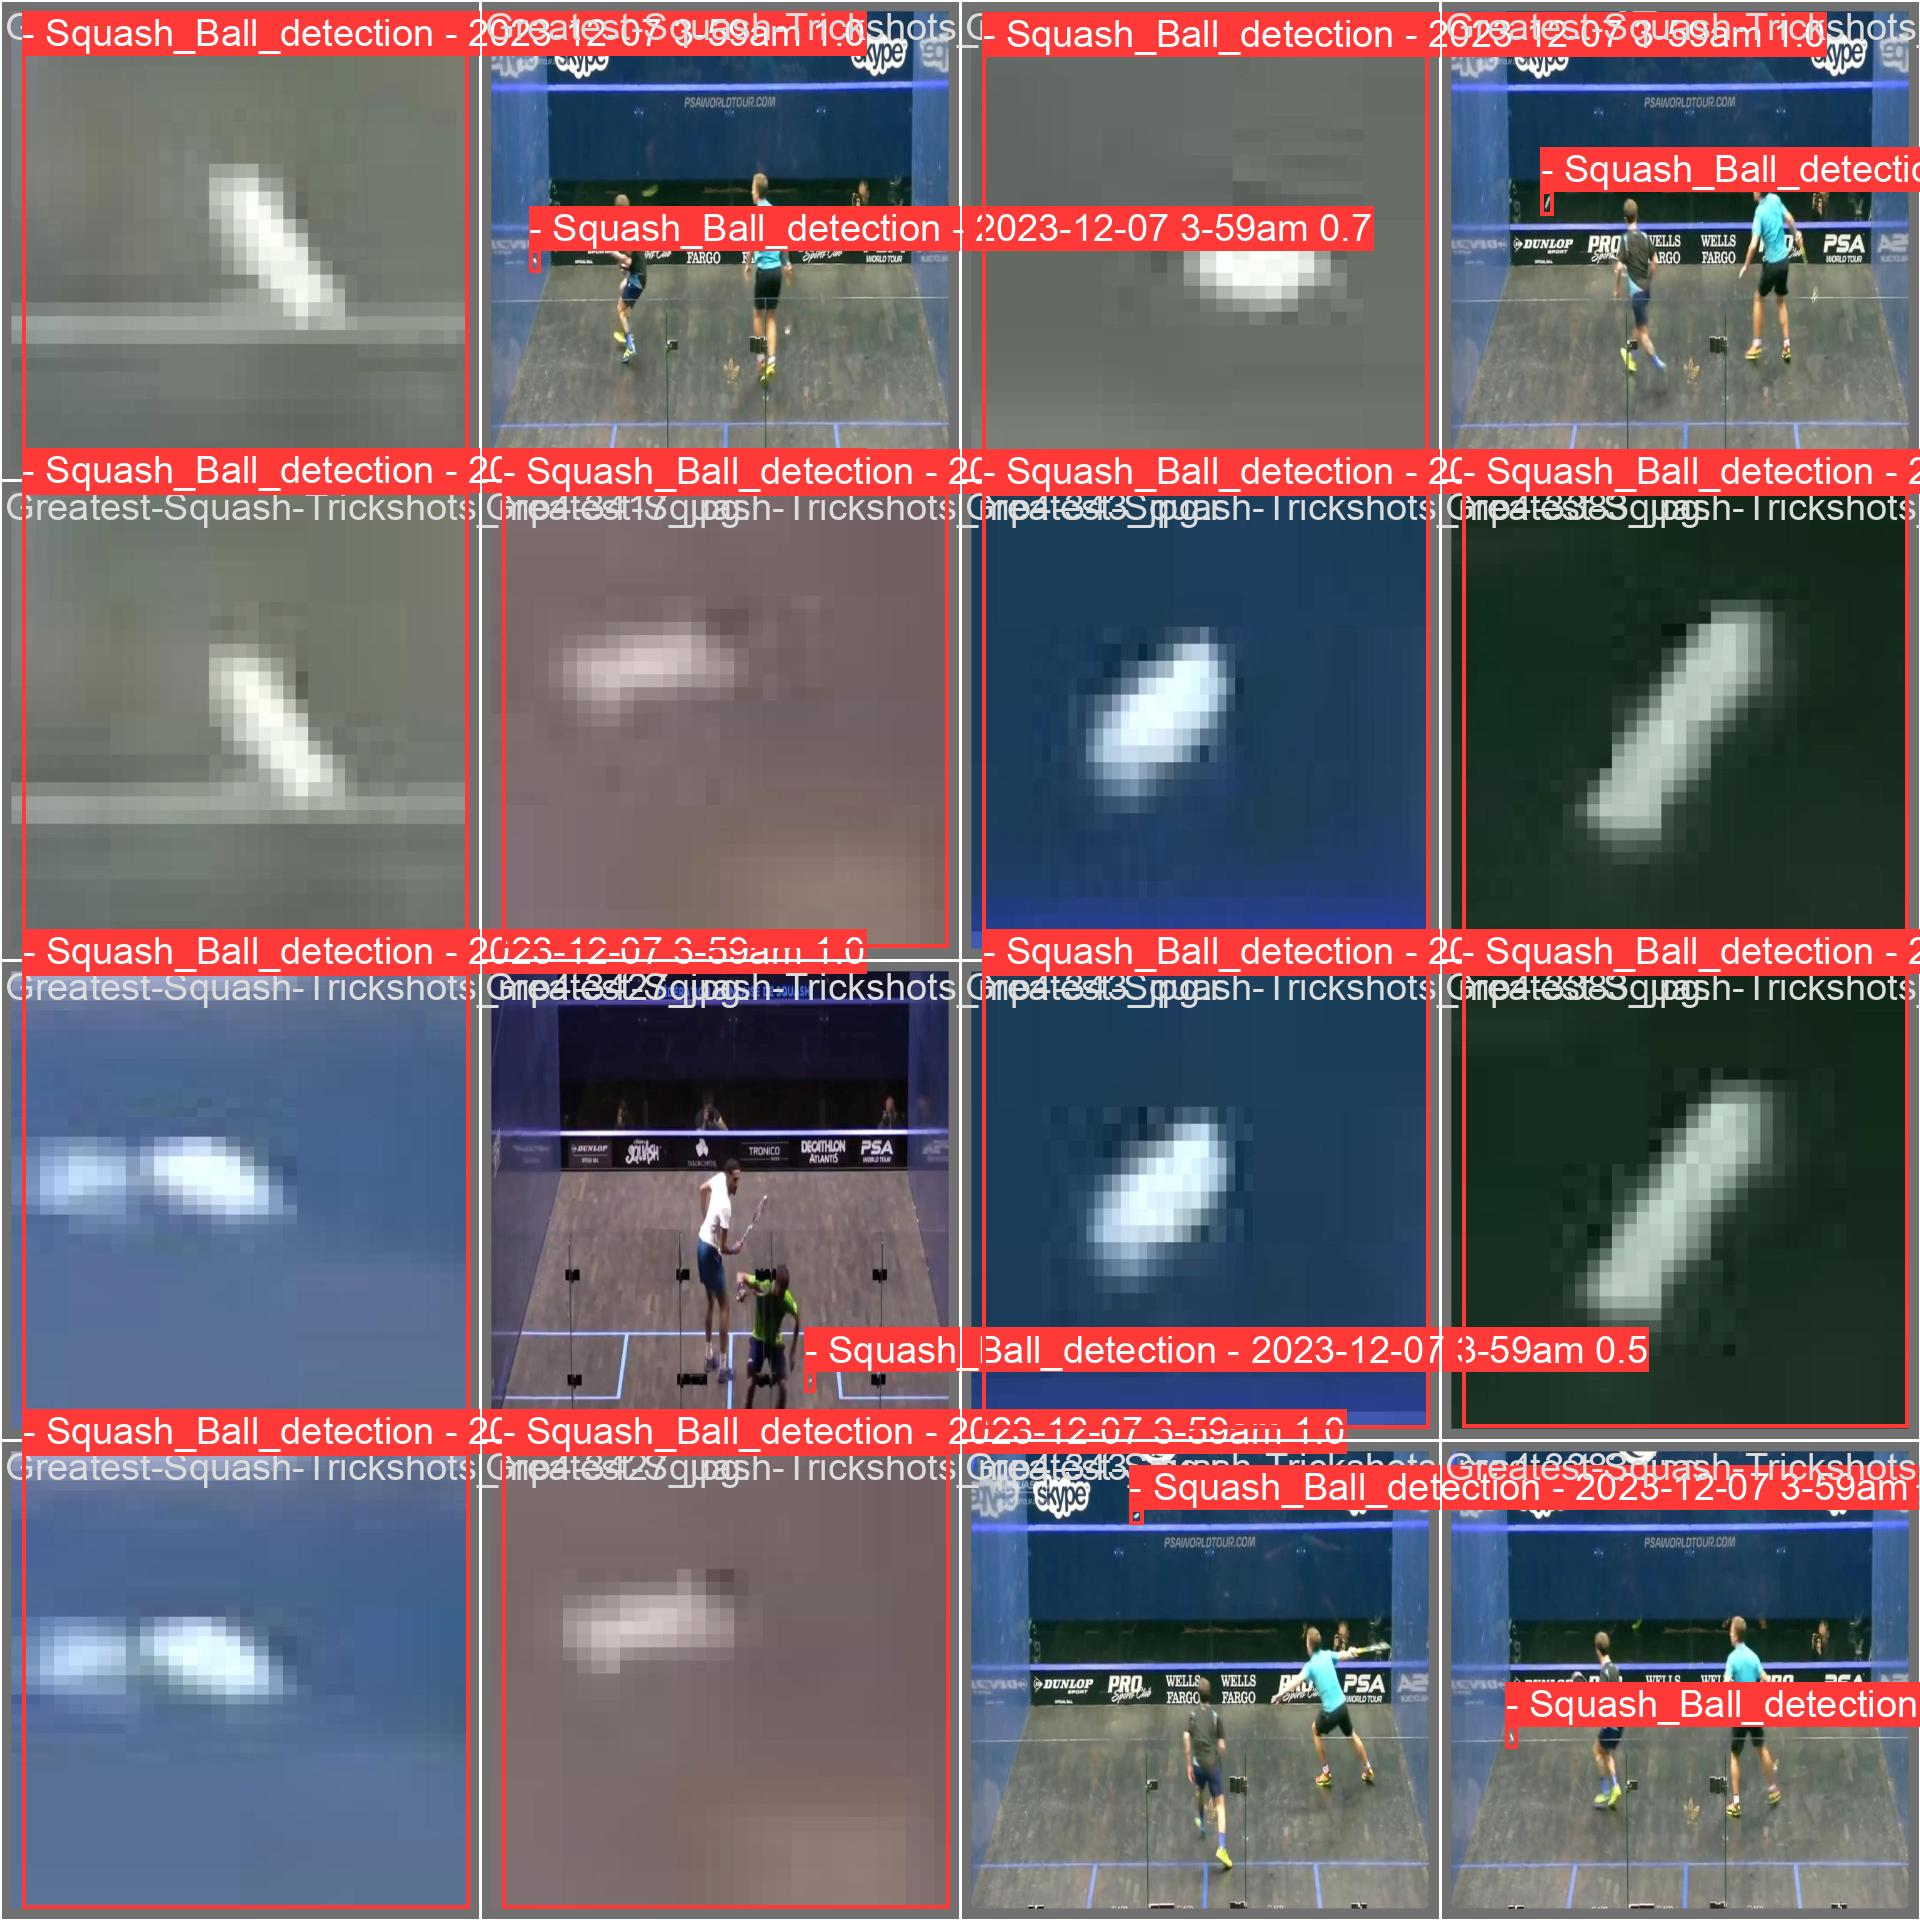

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/val_batch2_pred.jpg', width=600)

In [21]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/sq-ball-detection-1/valid/labels.cache... 0 images, 715 backgrounds, 0 corrupt: 100% 715/715 [00:00<?, ?it/s]
WARNING ⚠️ No labels found in /content/datasets/sq-ball-detection-1/valid/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 45/45 [00:10<00:00,  4.30it/s]
                   all        715          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 0.8ms preprocess, 9.1ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [23]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/286 /content/datasets/sq-ball-detection-1/test/images/Greatest-Squash-Trickshots_mp4-1010_jpg.rf.6dc0c6d77d7a6679693b0e7b2f795a36.jpg: 640x640 (no detections), 16.3ms
image 2/286 /content/datasets/sq-ball-detection-1/test/images/Greatest-Squash-Trickshots_mp4-1010_jpg.rf.b5842dd53de5166bf99048767981658c.jpg: 640x640 1 - Squash_Ball_detection - 2023-12-07 3-59am, 16.3ms
image 3/286 /content/datasets/sq-ball-detection-1/test/images/Greatest-Squash-Trickshots_mp4-1027_jpg.rf.257fe97d9031efd9ab3020431654afb7.jpg: 640x640 1 - Squash_Ball_detection - 2023-12-07 3-59am, 16.4ms
image 4/286 /content/datasets/sq-ball-detection-1/test/images/Greatest-Squash-Trickshots_mp4-1027_jpg.rf.52cde8bf255e87f6fe6d28d49ad108aa.jpg: 640x640 1 - Squash_Ball_detection - 2023-12-07 3-59am, 16.2ms
image 5/286 /content/datasets/s

In [24]:
!zip -r /content/predictions.zip /content/runs/detect/predict

  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/_Controlling-It-Like-a-Joke-_-_-Asal-v-Elias-_-VITAGEN-Singapore-Squash-Open-2023-_-SF-HIGHLIGHTS-SQUASHTV-_mp4-674_jpg.rf.d1df865598358204de62f547d4d9dc9d.jpg (deflated 5%)
  adding: content/runs/detect/predict/youtube-254_jpg.rf.cb0268d0ecfda985620d68ac61c1bb17.jpg (deflated 4%)
  adding: content/runs/detect/predict/_ABSOLUTELY-RUTHLESS-_-_-Subramaniam-v-Orfi-_-Hong-Kong-Football-Club-Open-2023-_-FINAL-HIGHLIGHTS-SQUASHTV-_mp4-327_jpg.rf.b1280c079833caa37d68ae5eb829ea18.jpg (deflated 6%)
  adding: content/runs/detect/predict/youtube-597_jpg.rf.1d2d3ccf5ef5f4642514aef1d1ce95d5.jpg (deflated 27%)
  adding: content/runs/detect/predict/youtube-849_jpg.rf.8dcaffbcfbf1c4d520fc84bef01739ed.jpg (deflated 5%)
  adding: content/runs/detect/predict/Squash-Refereeing_-Alison-Waters-v-Joelle-King-Stroke_mp4-289_jpg.rf.d77a4a4d32a9939324ae9fecb62404f1.jpg (deflated 4%)
  adding: content/runs/detect/predict/Squ

In [25]:
files.download("/content/predictions.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

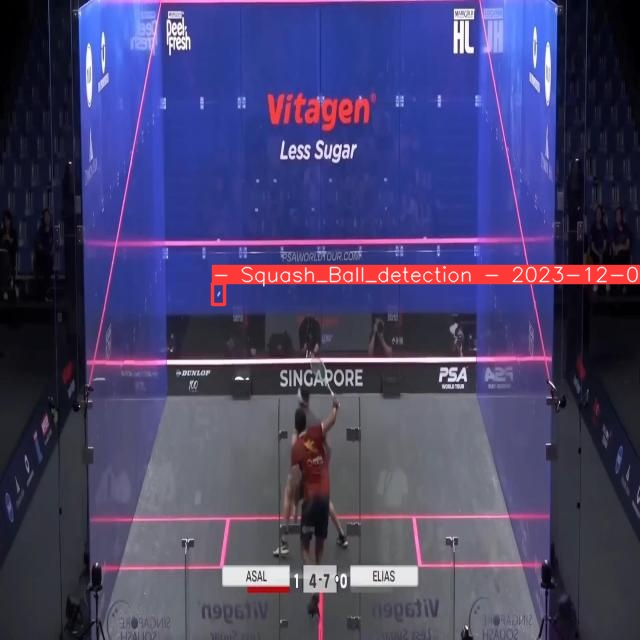

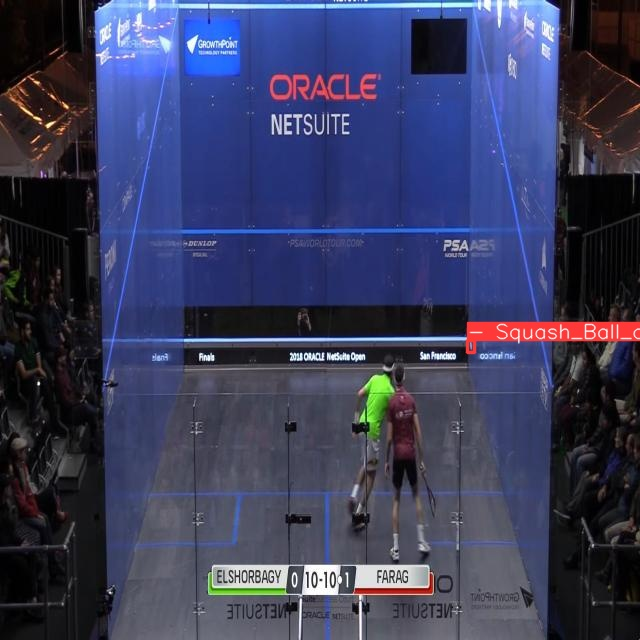

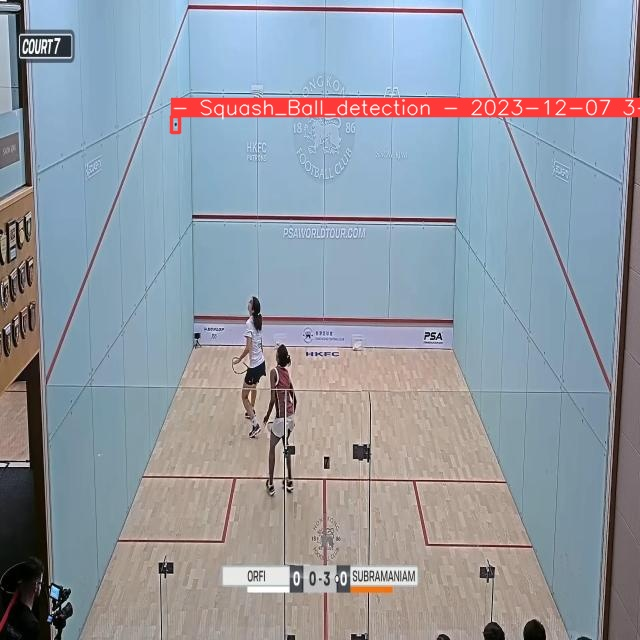

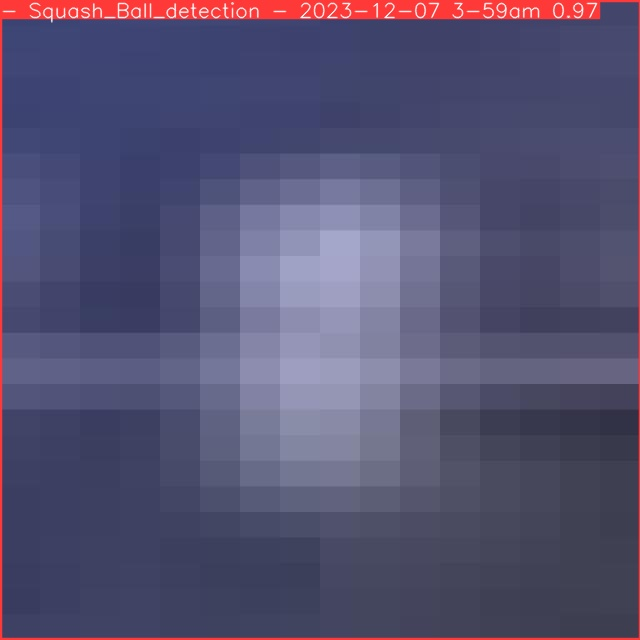

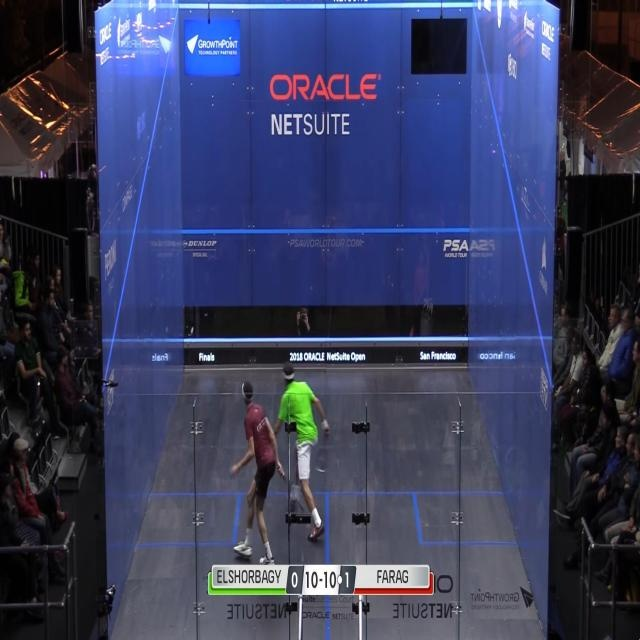

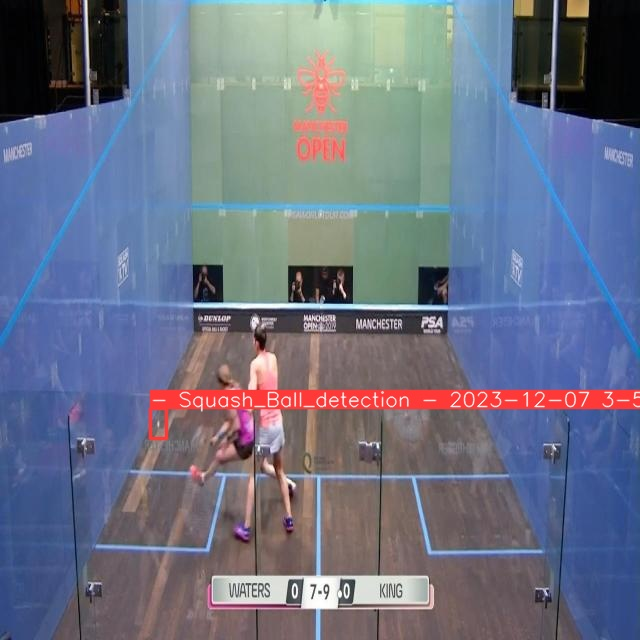

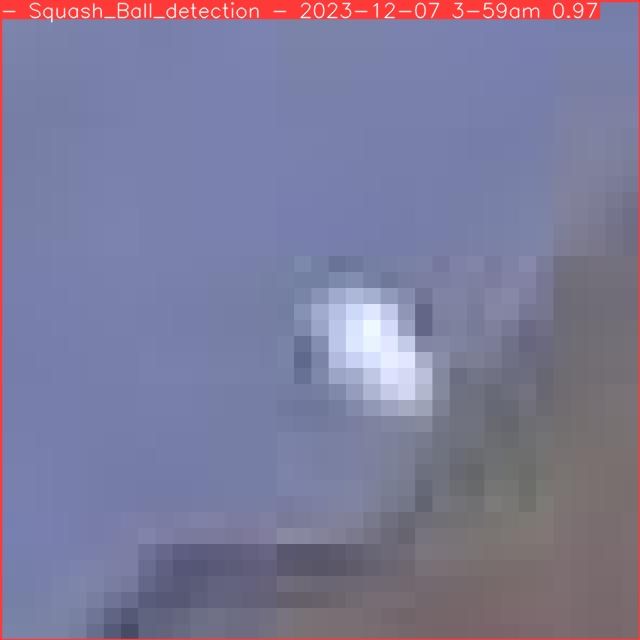

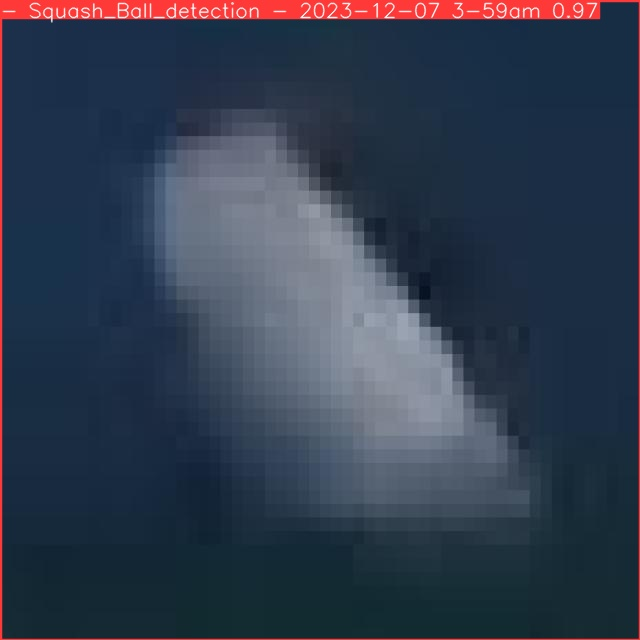

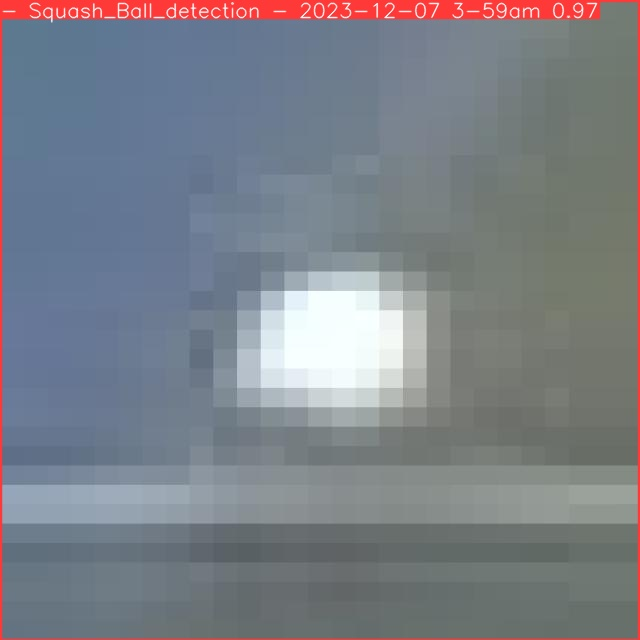

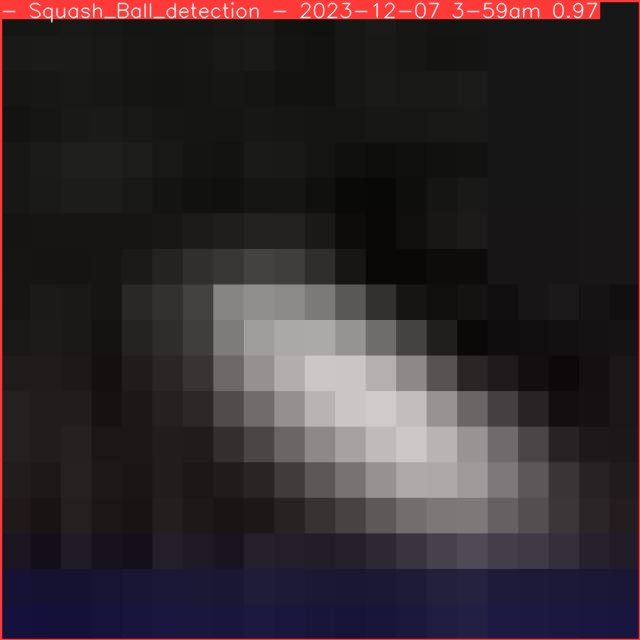

In [26]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")